# CryptoCurrency : DogeCoin Prediction in USD (Beginners Level)

Here is the data of the Price of the Famous Cryptocurrency i.e Dogecoin from 2014 to 2021. Here we do the analysis of the price hike in the recent scenario.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DOGE-USD.csv')

In [3]:
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0
5,2014-09-22,0.000288,0.000301,0.000285,0.000298,0.000298,620222.0
6,2014-09-23,0.000298,0.000318,0.000295,0.000313,0.000313,739197.0
7,2014-09-24,0.000314,0.000353,0.000310,0.000348,0.000348,1277840.0
8,2014-09-25,0.000347,0.000383,0.000332,0.000375,0.000375,2393610.0
9,2014-09-26,0.000374,0.000467,0.000373,0.000451,0.000451,4722610.0


In [4]:
df1 = df.tail(135)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2298,2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,2.289615e+08
2299,2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3.421563e+09
2300,2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2.707004e+09
2301,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
2302,2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,6.872561e+08


Here we see the data ranges from 2014 to 2021.

Let Check the null values in the dataset

In [5]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
#list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Open 0.0016  % missing values
High 0.0016  % missing values
Low 0.0016  % missing values
Close 0.0016  % missing values
Adj Close 0.0016  % missing values
Volume 0.0016  % missing values


## Lets Visualize the dataset with the Timespan

Text(0.5, 1.0, 'Date vs Volume')

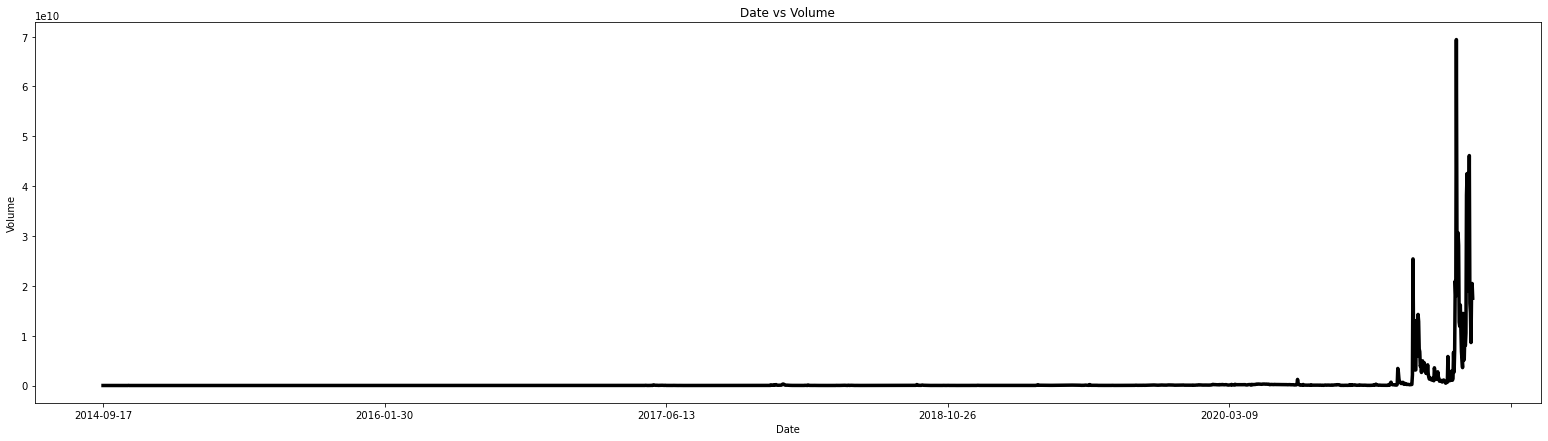

In [7]:
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

### Lets Visualize the dataset with the Timespan of year 2021

Text(0.5, 1.0, 'Date vs Volume of 2021')

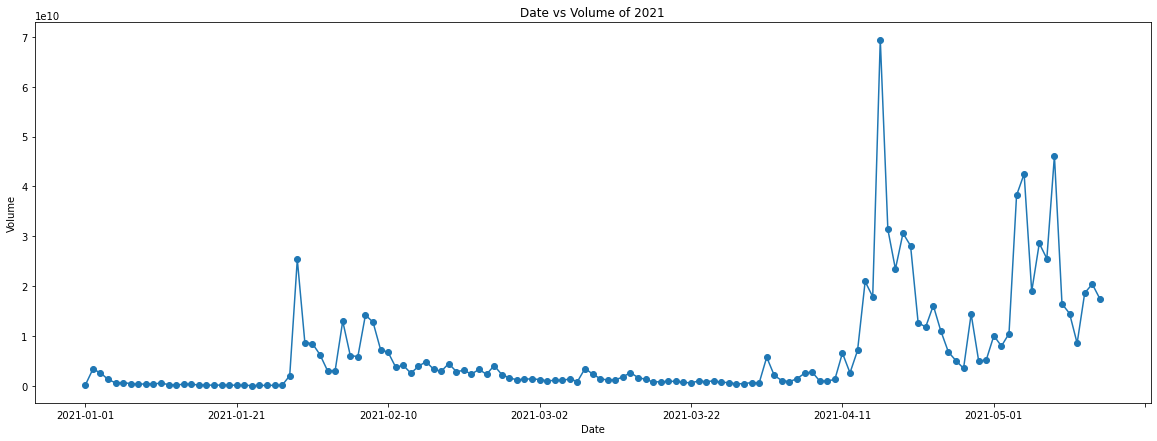

In [8]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2021")

Text(0.5, 1.0, 'Date vs Open of 2021')

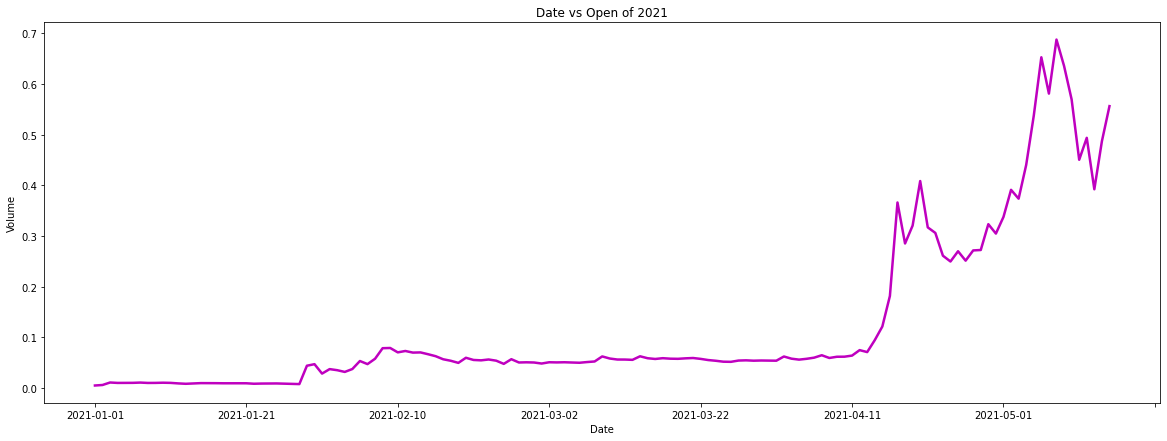

In [9]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2021")

Text(0.5, 1.0, 'Date vs High of 2021')

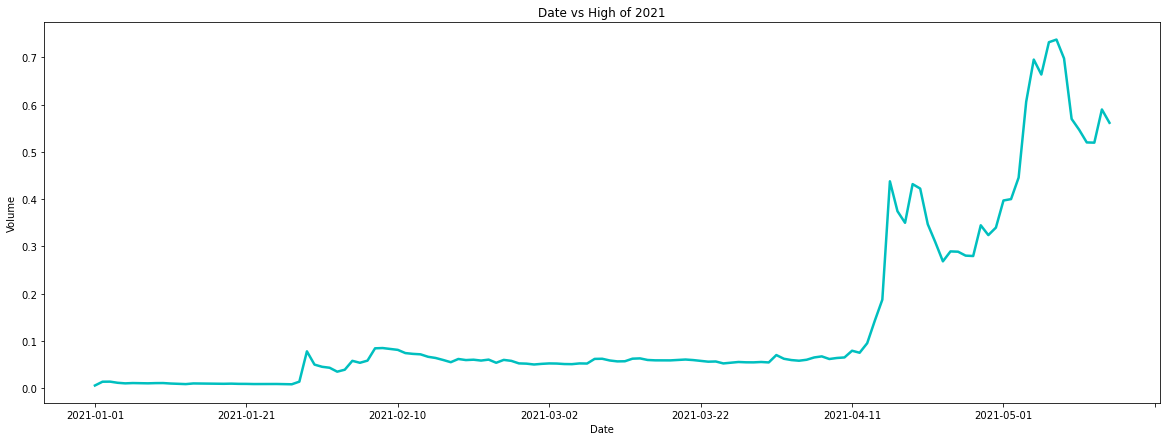

In [10]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2021")

Text(0.5, 1.0, 'Date vs Low of 2021')

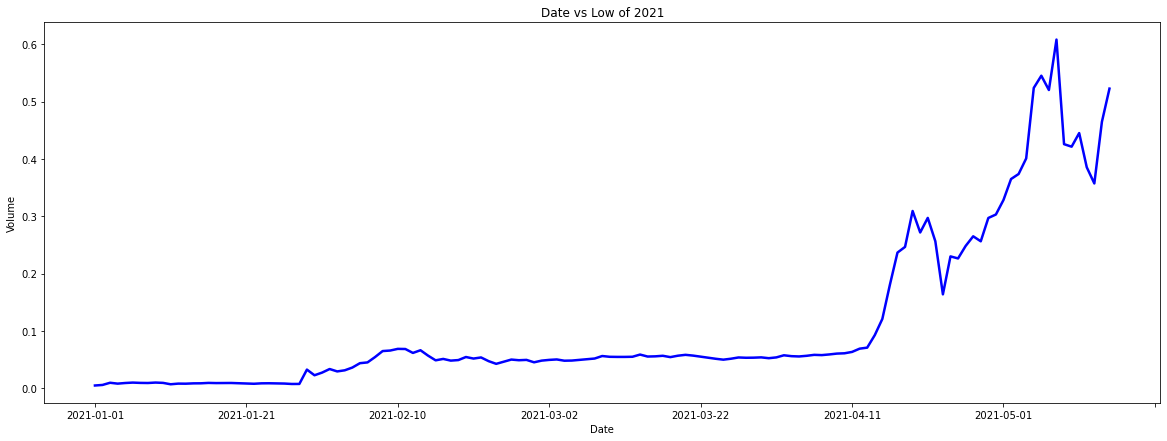

In [11]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2021")

Text(0.5, 1.0, 'Date vs Close of 2021')

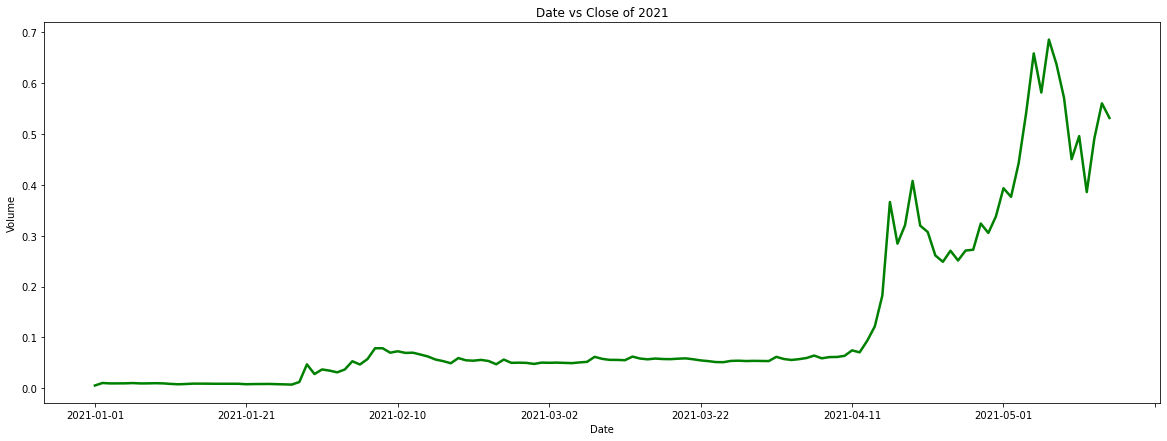

In [12]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

Text(0.5, 1.0, 'Date vs Adj Close of 2021')

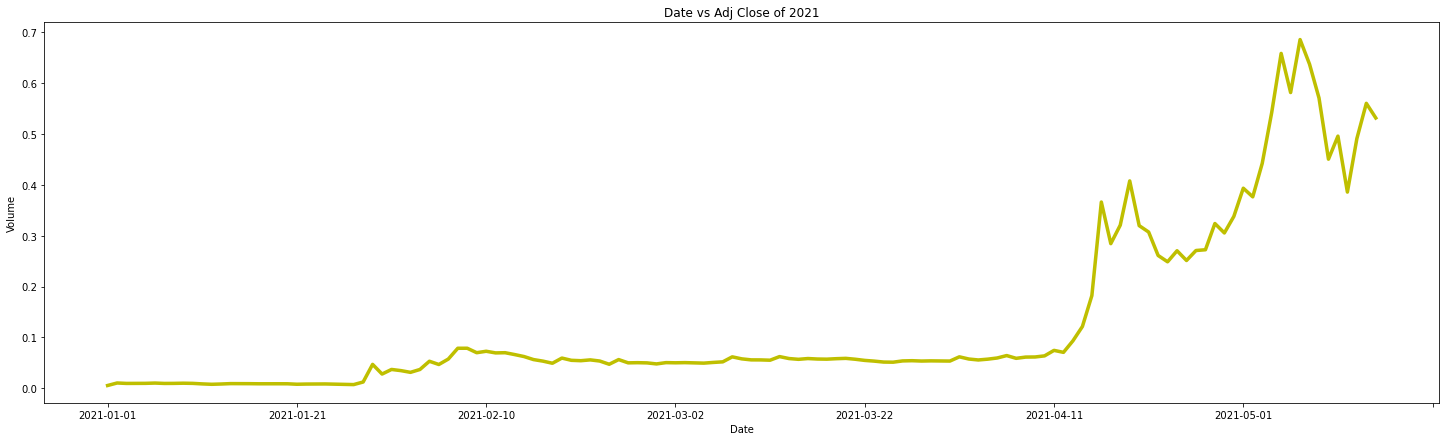

In [13]:
plt.figure(figsize=(25,7))
df1.groupby('Date')['Adj Close'].mean().plot(linewidth = 3.5, color = 'y')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Adj Close of 2021")

#### Lets Check the correlation between features of the dataset. How much they close to eachother.

In [14]:
new_df =pd.read_csv('DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')

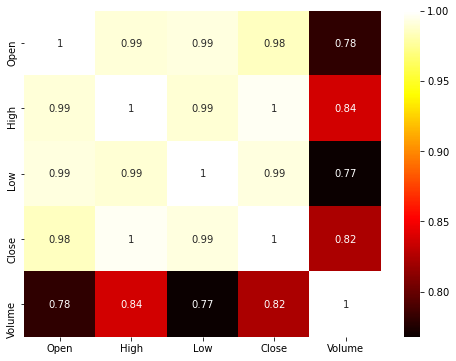

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

From the above figure we can see that all the features are closely related to each other.

## Split Data 

In [16]:
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2433, 4)
Shape of y =  (2433,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1703, 4)
Shape of y_train =  (1703,)
Shape of X_test =  (730, 4)
Shape of y_test =  (730,)


### Lets Train the Model.

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

Prediction Score

In [20]:
regressor.score(X_test, y_test)

0.9916528494651108

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
ds = pd.DataFrame()
ds['High']=y_test

In [23]:
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
438,0.000132,0.000133
2121,0.005420,0.005581
611,0.000228,0.000230
1104,0.001182,0.001066
2111,0.002361,0.002356
1972,0.003303,0.003343
1462,0.006280,0.006946
1070,0.001731,0.001749
251,0.000162,0.000162
2320,0.008808,0.008980


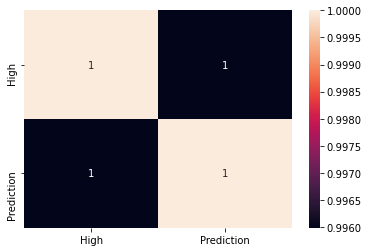

In [24]:
sns.heatmap(ds.corr(), annot = True)

Here we can see that  from the correlation Matrix that our Actual Data Set and the Predicted data set is higly correlated.